<a href="https://colab.research.google.com/github/AyushBhatt99/Short-term-Load-Forecasting/blob/main/randomf_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [36]:
df = pd.read_csv('load.csv')
data= df.copy()
# data

In [37]:
df['Datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index(['Datetime'])
del df['datetime']
# df

In [38]:
scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']]=scaler.fit_transform(df[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']])
df

,temp_2M,humidity_2M,precipitation_2M,wind_speed_2M,holiday,net_demand
Datetime,,,,,,
2015-01-03 01:00:00,0.240921,0.613218,0.031030,0.556888,0.0,970.3450
2015-01-03 02:00:00,0.243734,0.620449,0.031499,0.564955,0.0,912.1755
2015-01-03 03:00:00,0.246880,0.631220,0.029698,0.572297,0.0,900.2688
2015-01-03 04:00:00,0.248557,0.642709,0.031221,0.563516,0.0,889.9538
2015-01-03 05:00:00,0.249905,0.651273,0.033153,0.539947,0.0,893.6865
...,...,...,...,...,...,...
2020-06-26 20:00:00,0.355208,0.775576,0.106499,0.236618,0.0,1128.5592
2020-06-26 21:00:00,0.343048,0.784191,0.103308,0.250595,0.0,1112.7488
2020-06-26 22:00:00,0.332423,0.789221,0.109836,0.261430,0.0,1081.5680


In [39]:
df.isna().sum()

temp_2M             0
humidity_2M         0
precipitation_2M    0
wind_speed_2M       0
holiday             0
net_demand          0
dtype: int64

In [40]:
data.drop('datetime', axis=1, inplace=True)

In [41]:
scaler = MinMaxScaler()
# model=scaler.fit(data_f)
# df=model.transform(data_f)
data[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']]=scaler.fit_transform(data[['temp_2M', 'humidity_2M', 'precipitation_2M', 'wind_speed_2M', 'holiday']])
data

,temp_2M,humidity_2M,precipitation_2M,wind_speed_2M,holiday,net_demand
0,0.240921,0.613218,0.031030,0.556888,0.0,970.3450
1,0.243734,0.620449,0.031499,0.564955,0.0,912.1755
2,0.246880,0.631220,0.029698,0.572297,0.0,900.2688
3,0.248557,0.642709,0.031221,0.563516,0.0,889.9538
4,0.249905,0.651273,0.033153,0.539947,0.0,893.6865
...,...,...,...,...,...,...
48043,0.355208,0.775576,0.106499,0.236618,0.0,1128.5592
48044,0.343048,0.784191,0.103308,0.250595,0.0,1112.7488
48045,0.332423,0.789221,0.109836,0.261430,0.0,1081.5680
48046,0.323845,0.790665,0.123126,0.263065,0.0,1041.6240


In [42]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [43]:
# X

In [44]:
# y

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [46]:
#new_y_test = y_test
y_test

array([1436.8196, 1484.7839, 1552.5846, ..., 1099.3134,  988.2384,
       1261.5236])

In [47]:
#Import the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 200, random_state = 0)
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [48]:
# RandomForestRegressor(bootstrap=True, criterion='rmse', max_depth=10,
#                       max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0,
#                       min_samples_leaf=1, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=500,
#                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
#                       warm_start=False)

In [49]:
#Predicted load from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((X_test))
y_predict_rfr


array([1406.9431745 , 1464.3483095 , 1369.8965485 , ..., 1039.5840675 ,
       1045.6768455 , 1139.91199063])

In [50]:
# print(y_test)

In [51]:
#Model Evaluation using RMSE for Random Forest Regression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
rmse_new = mean_squared_error(y_test, y_predict_rfr, squared=False)
print('rmse associated with Random Forest Regression is:', rmse_new)

rmse associated with Random Forest Regression is: 124.30489931086485


In [52]:
error_percent_new = ((rmse_new/y_test.mean())*100)/2
print('error_percent_new:',error_percent_new)

error_percent_new: 5.249465498710328


In [53]:
# Calculate the absolute errors
errors = abs(y_predict_rfr - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 97.51
Accuracy: 91.62 %.


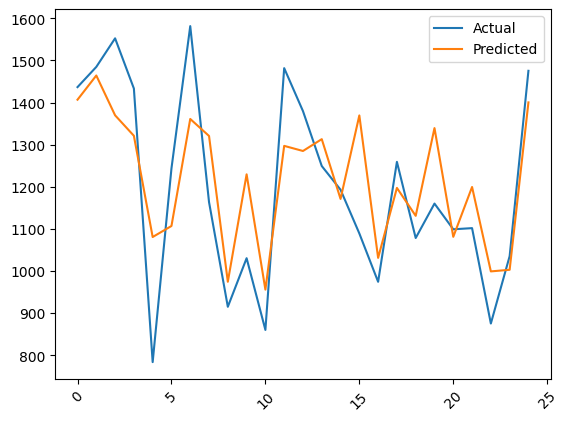

In [54]:
plt.plot(y_test[0:25], label='Actual')
plt.plot(y_predict_rfr[0:25], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

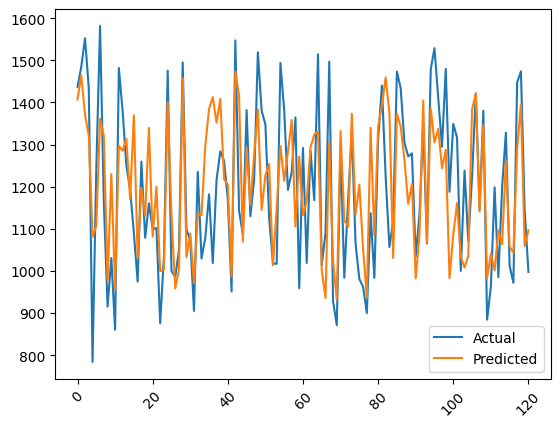

In [55]:
plt.plot(y_test[0:121], label='Actual')
plt.plot(y_predict_rfr[0:121], label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [57]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime

# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/forecast?units=metric&q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print('Failed to fetch weather data')
        return None

# Define your API key and city
api_key = '72f08c0b39657cb8f3e52f34c851a4d7'
city = 'Varanasi'  # You can change this to your desired city

# Fetch weather data
weather_data = fetch_weather_data(api_key, city)

if weather_data is not None:
    # Extract information from the first forecast
    first_forecast = weather_data['list'][0]
    datetime_str = first_forecast['dt_txt']
    temperature = first_forecast['main']['temp']
    humidity = first_forecast['main']['humidity']
    precipitation = 0.0597976  # Assuming precipitation data is not available in the response
    wind = first_forecast['weather'][0]['description']
    wind_speed = first_forecast['wind']['speed']

    # Determine if it's a holiday (Sunday or Monday)
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    day_of_week = datetime_obj.weekday()
    holiday = 1 if day_of_week == 6 or day_of_week == 0 else 0

    # Print the extracted information
    print(f'Date Time: {datetime_str}')
    print(f'Temperature: {temperature}')
    print(f'Humidity: {humidity}')
    print(f'Precipitation: {precipitation}')  # Assuming precipitation data is not available

    print(f'Wind Speed: {wind_speed} ')
    print(f'Holiday: {holiday}')  # Print holiday value
else:
    print('Weather data fetch failed.')


Date Time: 2024-04-21 12:00:00
Temperature: 38.05
Humidity: 14
Precipitation: 0.0597976
Wind Speed: 6.89 
Holiday: 1


In [56]:
import numpy as np
import pandas as pd
import requests
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Function to fetch weather data from OpenWeatherMap API
def fetch_weather_data(api_key, city):
    url = f'https://api.openweathermap.org/data/2.5/forecast?units=metric&q={city}&appid={api_key}'
    response = requests.get(url)
    if response.status_code == 200:
        weather_data = response.json()
        return weather_data
    else:
        print('Failed to fetch weather data')
        return None

# Define your API key and city
api_key = '72f08c0b39657cb8f3e52f34c851a4d7'
city = 'Varanasi'  # You can change this to your desired city

# Fetch weather data
weather_data = fetch_weather_data(api_key, city)

if weather_data is not None:
    # Extract information from the first forecast
    first_forecast = weather_data['list'][0]
    temperature = first_forecast['main']['temp']
    humidity = first_forecast['main']['humidity']
    precipitation = 0.0597976  # Assuming precipitation data is not available in the response
    wind_speed = first_forecast['wind']['speed']

    # Determine if it's a holiday (Sunday or Monday)
    datetime_str = first_forecast['dt_txt']
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
    day_of_week = datetime_obj.weekday()
    holiday = 1 if day_of_week == 6 or day_of_week == 0 else 0

    # Create a DataFrame with the fetched data
    data = {
        'temp_2M': temperature,
        'humidity_2M': humidity,
        'precipitation_2M': precipitation,
        'wind_speed_2M': wind_speed,
        'holiday': holiday
    }
    input_df = pd.DataFrame(data, index=[0])

    # Load your trained Random Forest model
    # Assuming you have already trained and saved your model
    # Load the model using appropriate libraries (e.g., joblib for saving/loading models)

    # Use MinMaxScaler to scale the input data
    scaler = MinMaxScaler()
    scaler.fit(X_train)  # Assuming X_train contains your training data
    input_df_scaled = scaler.transform(input_df)

    # Use your trained Random Forest model to predict net demand
    net_demand_prediction = RFReg.predict(input_df_scaled)

    # Display or use the predicted net demand value
    print("Predicted Net Demand:", net_demand_prediction)
else:
    print('Weather data fetch failed.')


Predicted Net Demand: [1255.5821295]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
